In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns


### 训练集和验证集数据分布

- 分析每个种类的数量分布

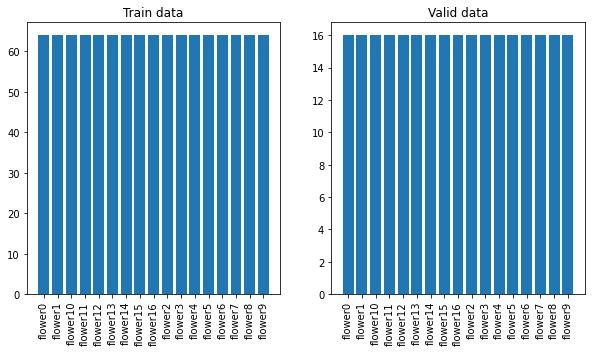

In [2]:
def get_data_num(path='./data/train/'):
    data_dict = {}
    classes_list = os.listdir(path)
    for i in range(len(classes_list)):
        num = len(os.listdir(path+'/'+classes_list[i]))
        data_dict[classes_list[i]] = num
    return data_dict
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
train_classes = list(get_data_num().keys())
train_num = list(get_data_num().values())
plt.bar(train_classes, train_num)
plt.xticks(rotation=90)
plt.title('Train data')

plt.subplot(1, 2, 2)
valid_classes = list(get_data_num('./data/test/').keys())
valid_num = list(get_data_num('./data/test/').values())
plt.bar(valid_classes, valid_num)
plt.xticks(rotation=90)
plt.title('Valid data')

plt.show()

### 训练集和验证集数据分布

- 分析训练集和验证集的图片大小分布

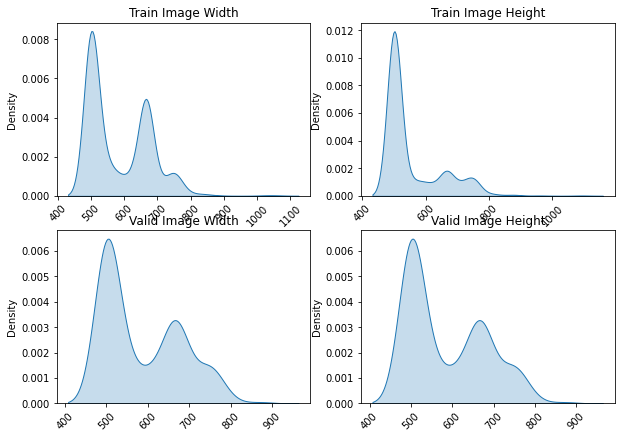

In [6]:
def get_img_size(path='./data/train/'):
    data_list = []
    classes_list = os.listdir(path)
    for i in range(len(classes_list)):
        img_names = os.listdir(path+'/'+classes_list[i])
        for j in range(len(img_names)):
            img_path = path+classes_list[i]+'/'+img_names[j]
            img_size = Image.open(img_path).size
            # print(img_size)
            # print(img_size)
            data_list.append(img_size)
    return data_list
    # return data_dict

train_img_size = get_img_size()
train_img_w = list(map(lambda x:x[0], train_img_size))
train_img_h = list(map(lambda x:x[1], train_img_size))
valid_img_size = get_img_size('./data/test/')
valid_img_w = list(map(lambda x:x[0], valid_img_size))
valid_img_h = list(map(lambda x:x[1], valid_img_size))
plt.figure(figsize=(10, 7))
plt.subplot(2, 2, 1)
sns.kdeplot(train_img_w, shade=True)
plt.xticks(rotation=45)
plt.title('Train Image Width')

plt.subplot(2, 2, 2)
sns.kdeplot(train_img_h, shade=True)
plt.xticks(rotation=45)
plt.title('Train Image Height')

plt.subplot(2, 2, 3)
sns.kdeplot(valid_img_w, shade=True)
plt.xticks(rotation=45)
plt.title('Valid Image Width')

plt.subplot(2, 2, 4)
sns.kdeplot(valid_img_w, shade=True)
plt.xticks(rotation=45)
plt.title('Valid Image Height')

plt.show()

In [1]:
import torch
torch.load('./weights/mobilenet_s0_dog.pth')

c:\python\anaconda\anaconda\envs\torch1\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


OrderedDict([('module.stage0.reparam_conv.weight',
              tensor([[[[ 1.2621e-02,  5.8361e-02, -6.1461e-02],
                        [-9.2825e-02, -4.7429e-02,  9.0189e-02],
                        [-2.1257e-02, -5.9573e-02,  2.4760e-02]],
              
                       [[ 3.4011e-02,  1.2710e-01, -1.0824e-01],
                        [-1.6966e-01,  1.4750e-01,  1.5943e-01],
                        [-3.0486e-02, -1.0136e-01,  3.3132e-02]],
              
                       [[ 1.4472e-02,  3.4735e-02, -4.0125e-02],
                        [-4.8528e-02, -5.9488e-02,  4.8162e-02],
                        [-4.3480e-03, -3.8916e-02,  1.0102e-02]]],
              
              
                      [[[-2.0722e-25, -6.4124e-25,  2.7767e-25],
                        [-1.5414e-25, -7.8112e-25, -4.8942e-25],
                        [ 4.2977e-25, -9.9402e-25, -2.7859e-25]],
              
                       [[-6.1120e-25, -4.1385e-25, -3.5574e-25],
                        